The goal of this analysis is to try to fit selected distributions to the wind speed data. The data has been downloaded from the <a href="https://power.larc.nasa.gov/data-access-viewer/">NASA website</a>. Surface type ("Crop: 20-m broadleaf-deciduous trees (10%) & wheat") has been chosen arbitrarily.<br> 
<ol>Steps:
    <li>Libraries import and parameter configuration</li>
    <li>Data preparation and preliminary analysis</li>
    <ul>
        <li>Data loading and preprocessing</li>
        <li>Data overview</li>
        <li>Checking original data and diving into groups</li>
    </ul>
    <li>Weibull distribution parameter estimation for wind speed data</li>
    <ul>
        <li>Creating basic functions</li>
        <li>Estimating paramters using Method of Moments (MoM)</li>
        <li>Estimating paramteres using Maximum Likelihood Estimation (MLE)</li>
        <li>Comparing results</li>
    </ul>
    <li>Rayleigh distribution parameter estimation for wind speed data</li>
    <ul>
        <li>Creating basic functions</li>
        <li>Estimating paramters using Method of Moments (MoM)</li>
        <li>Estimating paramteres using Maximum Likelihood Estimation (MLE)</li>
        <li>Comparing results</li>
    </ul>
    <li>Discussion and conclusions</li>
    <li>Ideas of extending the analysis</li>
</ol>

# 1. Libraries import and parameter configuration

In [1]:
import os

import numpy as np
import pandas as pd
import scipy as sc

import matplotlib.pyplot as plt
import seaborn as sns

#print options have been set to display only values instead of data format with values in parenthesis. 
np.set_printoptions(legacy='1.25')

# 2. Data preparation and preliminary analysis

This section focuses on preparing data for distribution fitting i.e.:
<ol>
    <li>Data loading and preprocessing</li>
    <ul>
        <li>Loading the data</li>
        <li>Checking for missing data</li>
        <li>Renaming columns to be understandable to people unfamiliar with the data</li>
    </ul>
    <li>Data overview</li>
    <ul>
        <li>General check of the data - mean, standard deviation, min, max, quartiles, dispersion and correlation</li>
    </ul>
    <li>Dividing data into groups</li>
    <ul>
        <li>Creating 2 subgroups of data</li>
        <li>Brief comparison of created groups and the general data</li>
    </ul>
</ol>

## 2.1. Data loading and preprocessing

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '1_wind_speed_distribution_estimation.ipynb',
 '2_wind_turbine_modeling.ipynb',
 'POWER_Point_Hourly_20230801_20250731_052d37N_017d62E_UTC.csv',
 'yaw_model_dataset.csv']

In [3]:
weather_df = pd.read_csv('POWER_Point_Hourly_20230801_20250731_052d37N_017d62E_UTC.csv', skiprows=list(range(15)),header=[0])
weather_df.set_index(pd.date_range(start='2023-08-01 00:00', end='2025-07-31 23:00', freq='1h'), inplace=True)
weather_df.head()

,YEAR,MO,DY,HR,WS50M,WD50M,T2M,PS,WSC
2023-08-01 00:00:00,2023,8,1,0,7.80,189.5,17.10,99.26,5.82
2023-08-01 01:00:00,2023,8,1,1,7.43,189.0,16.86,99.19,5.54
2023-08-01 02:00:00,2023,8,1,2,7.28,184.7,16.68,99.10,5.43
2023-08-01 03:00:00,2023,8,1,3,7.59,186.9,16.56,99.04,5.66
2023-08-01 04:00:00,2023,8,1,4,7.03,188.1,16.72,98.99,5.24


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2023-08-01 00:00:00 to 2025-07-31 23:00:00
Freq: h
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    17544 non-null  int64  
 1   MO      17544 non-null  int64  
 2   DY      17544 non-null  int64  
 3   HR      17544 non-null  int64  
 4   WS50M   17544 non-null  float64
 5   WD50M   17544 non-null  float64
 6   T2M     17544 non-null  float64
 7   PS      17544 non-null  float64
 8   WSC     17544 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.3 MB


In [5]:
weather_df.rename(columns={'WS50M': 'wind speed at 50 m [m/s]', 'T2M': 'temperature at 2 m [C]', 'PS': 'surface pressure [kPa]', 'WD50M': 'wind direction at 50 m [degrees]', 'WSC': 'corrected wind speed at 20 m [m/s]'}, inplace=True)
weather_df.head()

,YEAR,MO,DY,HR,wind speed at 50 m [m/s],wind direction at 50 m [degrees],temperature at 2 m [C],surface pressure [kPa],corrected wind speed at 20 m [m/s]
2023-08-01 00:00:00,2023,8,1,0,7.80,189.5,17.10,99.26,5.82
2023-08-01 01:00:00,2023,8,1,1,7.43,189.0,16.86,99.19,5.54
2023-08-01 02:00:00,2023,8,1,2,7.28,184.7,16.68,99.10,5.43
2023-08-01 03:00:00,2023,8,1,3,7.59,186.9,16.56,99.04,5.66
2023-08-01 04:00:00,2023,8,1,4,7.03,188.1,16.72,98.99,5.24


## 2.2. Data overview

In [6]:
weather_df.iloc[:,4:].describe()

,wind speed at 50 m [m/s],wind direction at 50 m [degrees],temperature at 2 m [C],surface pressure [kPa],corrected wind speed at 20 m [m/s]
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,6.537983,203.189888,10.579221,100.263727,4.876442
std,2.923667,86.388012,8.736366,0.961739,2.180644
min,0.090000,0.000000,-13.490000,96.350000,0.070000
25%,4.500000,141.600000,3.380000,99.690000,3.360000
50%,6.380000,217.400000,10.295000,100.280000,4.760000
75%,8.250000,271.500000,17.610000,100.900000,6.150000
max,19.370000,359.900000,32.810000,102.870000,14.450000


In [7]:
dispersion_df = weather_df.iloc[:,4:].describe().iloc[[1, 2],:].T
dispersion_df['CV'] = dispersion_df['std'] / dispersion_df['mean']
dispersion_df

,mean,std,CV
wind speed at 50 m [m/s],6.537983,2.923667,0.447182
wind direction at 50 m [degrees],203.189888,86.388012,0.425159
temperature at 2 m [C],10.579221,8.736366,0.825804
surface pressure [kPa],100.263727,0.961739,0.009592
corrected wind speed at 20 m [m/s],4.876442,2.180644,0.447179


Temperature is the most volatile value but taking into account seasons this should not be surprising. It can be noticed only ~20% of wind speed range is between 25th and 75th percentiles. Surface pressure remains very stable.

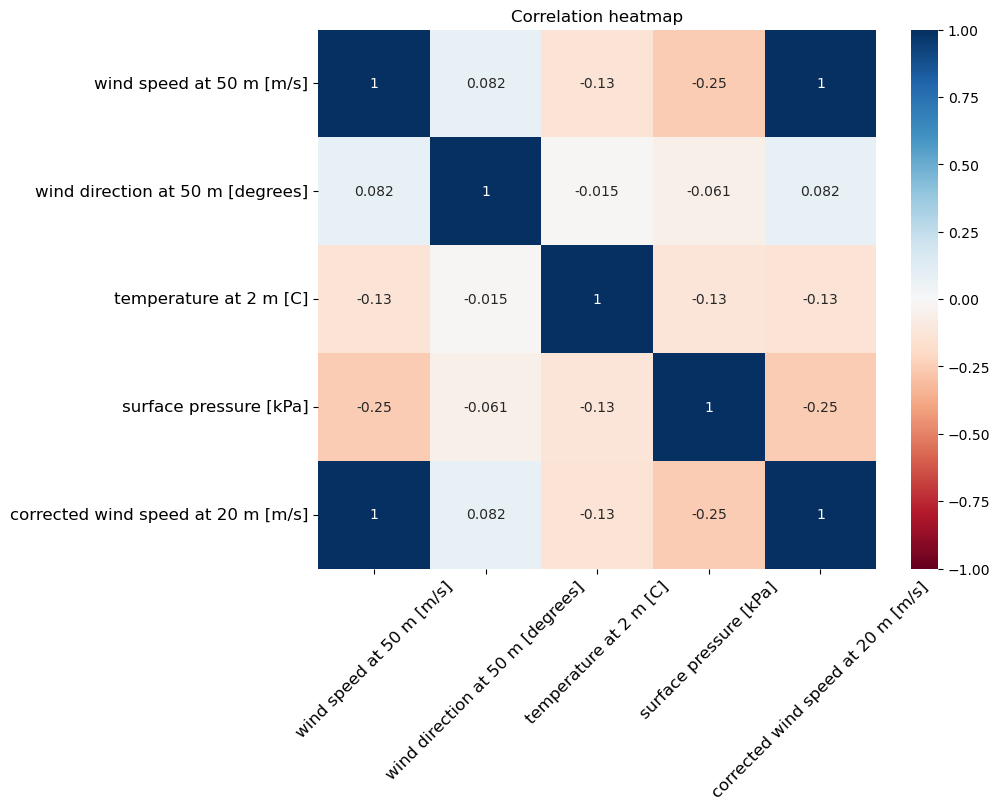

In [8]:
plt.figure(figsize=(9, 7))
s = sns.heatmap(weather_df.iloc[:, 4:].corr('spearman'), annot=True, cmap='RdBu', vmin=-1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=45, fontsize=12)
plt.title('Correlation heatmap')
plt.show()

The Spearman correlation coefficent has been used because it checks both linear and non-linear relationships while Pearson checks only the linear one. <br>
Correlation value for "wind speed at 50 m [m/s]"-"corrected wind speed at 20 m [m/s]" equals 1 because corrected wind speed value is calculated basing on the wind speed at 50 m. <br>
Correlations between "wind direction at 50 m [degrees]" and other vectors may be called weak (|coefficient| < 0,1). Remaining correlations can be defined as moderate. Results may have been different if all the data refered to the same height.

## 2.3. Dividing data into groups

Grouping wind speed data makes the need to fit a distribution to each group separately but may increase chances for the best fit. The reason to try to group the data is the fact the wind speed use to be different between months/seasons. Taking this into account the mean and median have been chosen as parameters which will help divide the data into to 2 groups.

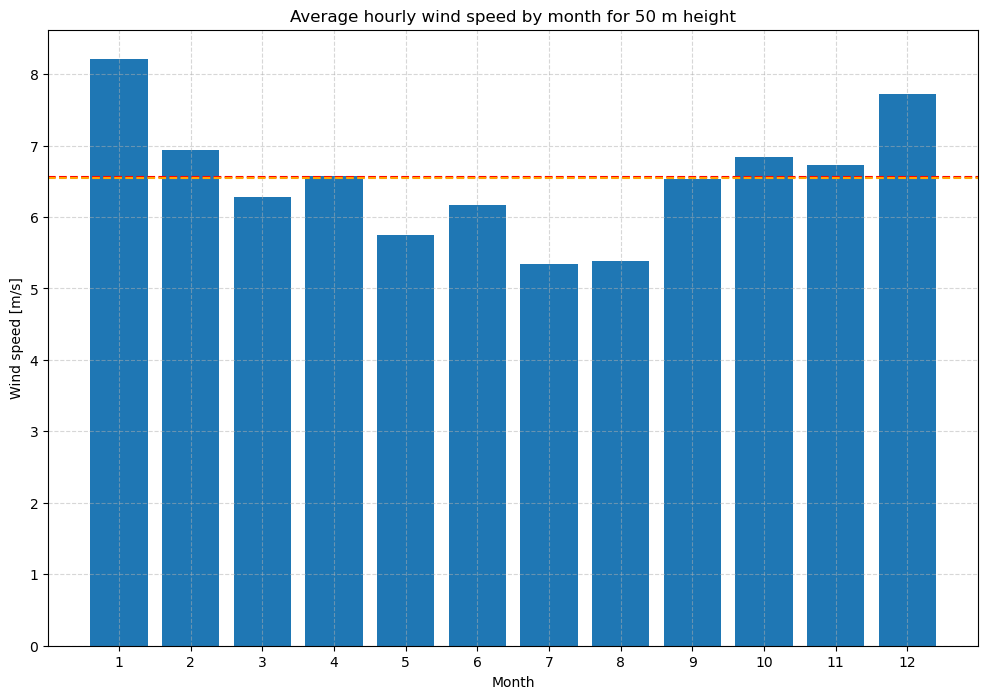

In [9]:
avg_by_month = weather_df.groupby(by='MO')[[
    'wind speed at 50 m [m/s]', 'wind direction at 50 m [degrees]',  'temperature at 2 m [C]', 'surface pressure [kPa]', 'corrected wind speed at 20 m [m/s]'
]].mean()
avg_by_month.sort_index(inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(x=avg_by_month.index, height=avg_by_month['wind speed at 50 m [m/s]'])

plt.axhline(avg_by_month['wind speed at 50 m [m/s]'].median(), linestyle='--', color='r')
plt.axhline(avg_by_month['wind speed at 50 m [m/s]'].mean(), linestyle='--', color='orange')

plt.xlabel('Month')
plt.ylabel('Wind speed [m/s]')
plt.title('Average hourly wind speed by month for 50 m height')

plt.xticks(avg_by_month.index)
plt.grid(visible=True, alpha=0.5, linestyle='--')

plt.show()


To visually distinguish months with higher and lower wind speed the <span style="color:red;">median (red)</span> and  <span style="color:orange;">mean (orange)</span> lines have been added to plots. Months 1, 2, 4 and 10-12 stand out comparing to the remaining ones. In the further analysis months will be presented as 3 groups:
<ul>
    <li>All months together will be called "<b>general</b>"</li>
    <li>1-4 and 10-12 will be called "<b>winter</b>"</li>
    <li>5-9 will be called "<b>summer</b>"</li>
</ul>
Although March's mean fits to the summer group, it has been decided months within each group should form a continuous range to reflect the gradual nature of weather changes throughout the year. Thus, March is in the winter group.

In [10]:
# extracting winter and summer groups
winter_mapper = (weather_df['MO'] <= 4) | (weather_df['MO'] >= 10)
summer_mapper = ~winter_mapper
winter_weather_df = weather_df.loc[winter_mapper, :]
summer_weather_df = weather_df.loc[summer_mapper, :]

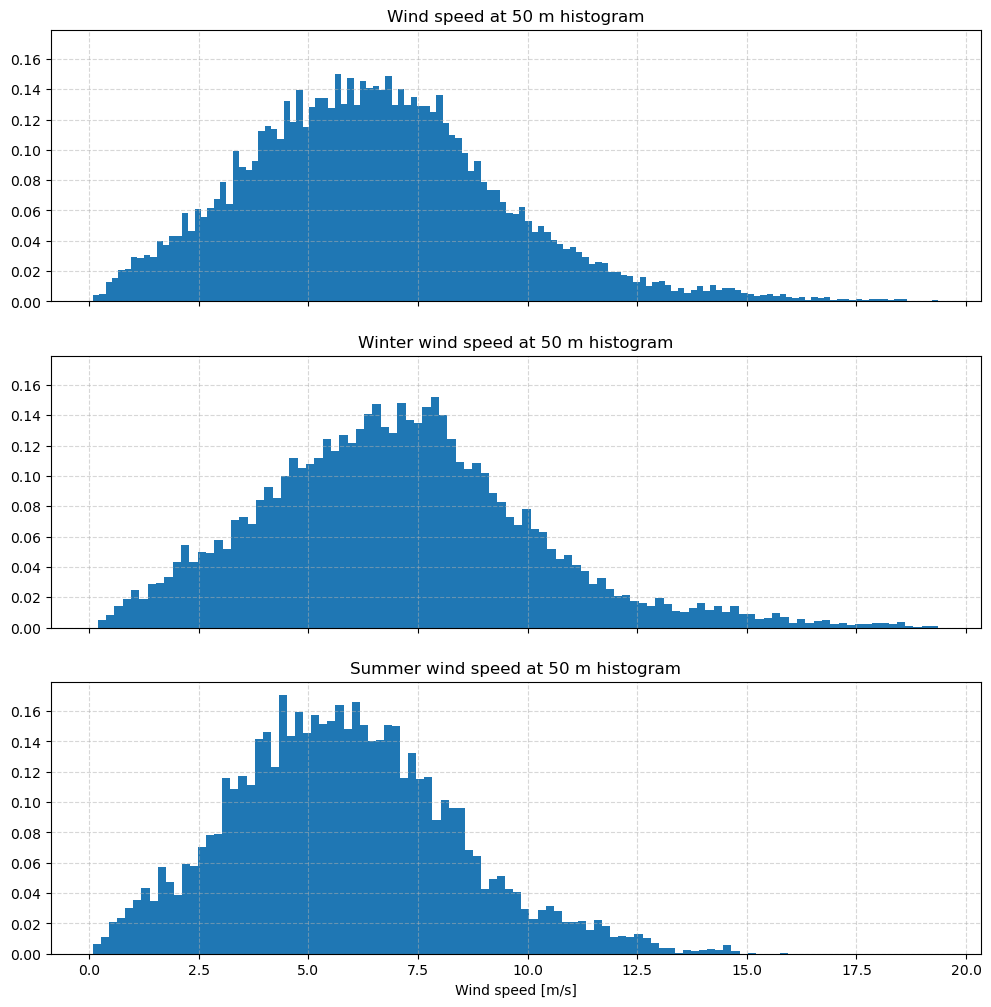

In [11]:
fig, axes = plt.subplots(3, 1, figsize = (12, 12), sharex=True, sharey=True)

axes[0].hist(weather_df['wind speed at 50 m [m/s]'], bins=int( np.ceil(weather_df.shape[0]**0.5) ), density=True)
axes[0].set_title('Wind speed at 50 m histogram')

axes[1].hist(winter_weather_df['wind speed at 50 m [m/s]'], bins=int( np.ceil(winter_weather_df.shape[0]**0.5) ), density=True )
axes[1].set_title('Winter wind speed at 50 m histogram')

axes[2].hist(summer_weather_df['wind speed at 50 m [m/s]'], bins=int( np.ceil(summer_weather_df.shape[0]**0.5) ), density=True )
axes[2].set_title('Summer wind speed at 50 m histogram') 
axes[2].set_xlabel('Wind speed [m/s]')

for ax in axes.ravel():
    ax.tick_params(labelleft=True)
    ax.grid(visible=True, alpha=0.5, linestyle='--')
    
plt.show()

In [12]:
shape_df = pd.DataFrame(
    data={
        'kurtosis': [group['wind speed at 50 m [m/s]'].kurt() for group in [weather_df, winter_weather_df, summer_weather_df]], 
        'skewness': [group['wind speed at 50 m [m/s]'].skew() for group in [weather_df, winter_weather_df, summer_weather_df]]
    }, 
    index=['General', 'Winter', 'Summer']
)
shape_df

,kurtosis,skewness
General,0.706527,0.572750
Winter,0.632147,0.535536
Summer,0.127950,0.384515


Skewness seems to be less volatile comparing to the kurtosis. <br>
All groups are mildly leptokurtic (leptokurtic: excess kurtosis > 0). In other words, these groups are a bit more peaked and heavy-tailed than the normal distribution. <br>
All groups have positive skewness, within 0,38-0,60 range, so may be treated as slightly right-skewed.

# 3. Weibull distribution parameter estimation for wind speed data

## 3.1 Creating basic functions

In [13]:
def weibull_pdf(k, c, v):
    return (k/c)*(v/c)**(k-1)*np.exp(-(v/c)**k)

def weibull_cdf(k, c, v):
    return 1 - np.exp(-(v/c)**k)

def weibull_ppf(k, c, cdf):  # reversed the cdf function to calculate v using k, c and cdf
    return c*(-np.log(1-cdf))**(1/k)
    

def weibull_qq_plot(data, k1, c1, k2, c2, method1, method2, group):
    data_sorted = data.sort_values(ignore_index=True)
    n = len(data_sorted)

    probs = (np.arange(1, n+1)-0.5)/n

    weibull_ppf1 = weibull_ppf(k1, c1, probs)
    weibull_ppf2 = weibull_ppf(k2, c2, probs)

    fig, axes = plt.subplots(1, 2, figsize = (18, 8), sharex=True, sharey=True)
    
    axes[0].scatter(weibull_ppf1, data_sorted, alpha=0.6, label='Data quantiles')
    axes[0].plot([0, max(data_sorted)], [0, max(data_sorted)], linestyle='--', color='r', label='y=x')
    axes[0].set_xlabel('Theoretical quantiles (Weibull)')
    axes[0].set_ylabel('Empirical quiantiles (data)')
    axes[0].set_title(f'Q-Q Plot for estimated {method1}-based Weilbull distribution and {group} group')
    axes[0].legend()
    
    axes[1].scatter(weibull_ppf2, data_sorted, alpha=0.6, label='Data quantiles')
    axes[1].plot([0, max(data_sorted)], [0, max(data_sorted)], linestyle='--', color='r', label='y=x')
    axes[1].set_xlabel('Theoretical quantiles (Weibull)')
    axes[1].set_ylabel('Empirical quiantiles (data)')
    axes[1].set_title(f'Q-Q Plot for estimated {method2}-based Weilbull distribution and {group} group')
    axes[1].legend()

    for ax in axes.ravel():
        ax.tick_params(labelleft=True)
        ax.grid(visible=True, alpha=0.5, linestyle='--')

    plt.show()

## 3.2 Estimating parameters using moment-based (mean and std) formulas

$$
\bar{v} = c\Gamma(1+\frac{1}{k})
$$
$$
(\sigma_v)^2 = c^{2}[\Gamma(1+\frac{2}{k}) - (\Gamma(1+\frac{1}{k}))^2]
$$
The pure Method of Moments approach would assume solving e.g. above equations to acquire k and c parameters. It has been decided to calculate the k parameter using the approximate relation which is treated as a special case of the method of moments.

$$
k \approx \left( \frac{{\sigma}_v}{\bar{v}} \right)^{-1,086}
$$
With the estimated k parameter, the mean formula can be transformed to be used to calculate the c parameter:
$$
c = \frac{\bar{v}}{\Gamma\!\left(1 + \tfrac{1}{k}\right)}
$$
Source:<br>
<i>Methods for Estimating Wind Speed Frequency Distributions</i>, C. G. Justus, W. R. Hargraves, Amir Mikhail, and Denise Graber, 1978<br>
<i>Parameter estimation of weibull probability distribution by seven methods – a wind regime of the city of nitra, Slovakia</i>, Ivana Pobočíková, Zuzana Sedliačková, Mária Michalková, Daniela Jurášová, 2024

In [14]:
def weibull_params_mom(std, avg):
    k = (std/avg)**-1.086
    c = avg/sc.special.gamma(1 + 1/k)
    return k, c

In [15]:
g_k, g_c = weibull_params_mom(weather_df['wind speed at 50 m [m/s]'].std(ddof=1), weather_df['wind speed at 50 m [m/s]'].mean())
w_k, w_c = weibull_params_mom(winter_weather_df['wind speed at 50 m [m/s]'].std(ddof=1), winter_weather_df['wind speed at 50 m [m/s]'].mean())
s_k, s_c = weibull_params_mom(summer_weather_df['wind speed at 50 m [m/s]'].std(ddof=1), summer_weather_df['wind speed at 50 m [m/s]'].mean())

print(
    'Estimated parameters for the general group: k={}, c={}'.format(g_k, g_c), 
    'Estimated parameters for the winter group: k={}, c={}'.format(w_k, w_c), 
    'Estimated parameters for the summer group: k={}, c={}'.format(s_k, s_c), 
    sep='\n'
)

Estimated parameters for the general group: k=2.3964821347739247, c=7.375399618836089
Estimated parameters for the winter group: k=2.459536965763741, c=7.94471086117662
Estimated parameters for the summer group: k=2.4733047326681574, c=6.574582995274821


## 3.3 Estimating parameters using Maximum Likelihood Estimation

Log-likelihood function:
$$
l(k,c) = n ln(k)\;-
\;nkln(c)\;+
\;(k-1)\sum_{i=1}^{n}ln(v_{i}) \;-
\;\sum_{i=1}^{n}(\frac{v_{i}}{c})^{k}
$$
<i>Estimating Weibull Parameters Using Maximum Likelihood Estimation and Ordinary Least Squares: Simulation Study and Application on Meteorological Data</i>, Nawal Adlina Mohd Ikbal, Syafrina Abdul Halim, Norhaslinda Ali, 2022

Scipy does not have a "maximize" function. Thus, the "minimize" function needs to be used to maximise te likelihood. To achieve this, the log-likelihood function has been multiplied by -1, so the scipy.optimise.minimise function will find argument for maximised log-likelihood. <br>
$$
k_{max}, c_{max} = argmax(f(k, c)) = argmin(-f(k, c))
$$

In [16]:
def neg_weibull_log_likelihood(params, data):
    k, c = params
    n = len(data)
    return -( n*np.log(k) - n*k*np.log(c) + (k-1)*np.sum(np.log(data)) - np.sum((data/c)**k) )

In [17]:
g_res = sc.optimize.minimize(fun=neg_weibull_log_likelihood, x0=[2, 5], args=(weather_df['wind speed at 50 m [m/s]']), method='Nelder-Mead')
w_res = sc.optimize.minimize(fun=neg_weibull_log_likelihood, x0=[2, 5], args=(winter_weather_df['wind speed at 50 m [m/s]']), method='Nelder-Mead')
s_res = sc.optimize.minimize(fun=neg_weibull_log_likelihood, x0=[2, 5], args=(summer_weather_df['wind speed at 50 m [m/s]']), method='Nelder-Mead')
print(
    'Estimated parameters for the general group: k={}, c={}'.format(g_res.x[0], g_res.x[1]), 
    'Estimated parameters for the winter group: k={}, c={}'.format(w_res.x[0], w_res.x[1]), 
    'Estimated parameters for the summer group: k={}, c={}'.format(s_res.x[0], s_res.x[1]), 
    sep='\n'
)

Estimated parameters for the general group: k=2.3544998653035796, c=7.366955587446104
Estimated parameters for the winter group: k=2.4167890447312113, c=7.935789036730427
Estimated parameters for the summer group: k=2.4362998840126133, c=6.564854143119398


## 3.4 Comparing results

Results will be compared using 3 methods:
<ol>
    <li>Plotting data's histogram together with fitted distribution pdf plots - Visual comparison how much the distribution's pdf plot fits histogram.</li>
    <li>Executing Kolmogorov-Smirnov test - Testing the "observed data comes from the given probability distribution" null hypothesis. If the p-value is higher than the chosen critical value (alpha), then the test does not show a statistically signifacnt difference between the data and the given probability distribution.</li>
    <li>Making Q-Q plot - Graphical comparison of empirical and theoretical distributions by plotting their quantiles against each other. </li>
</ol>

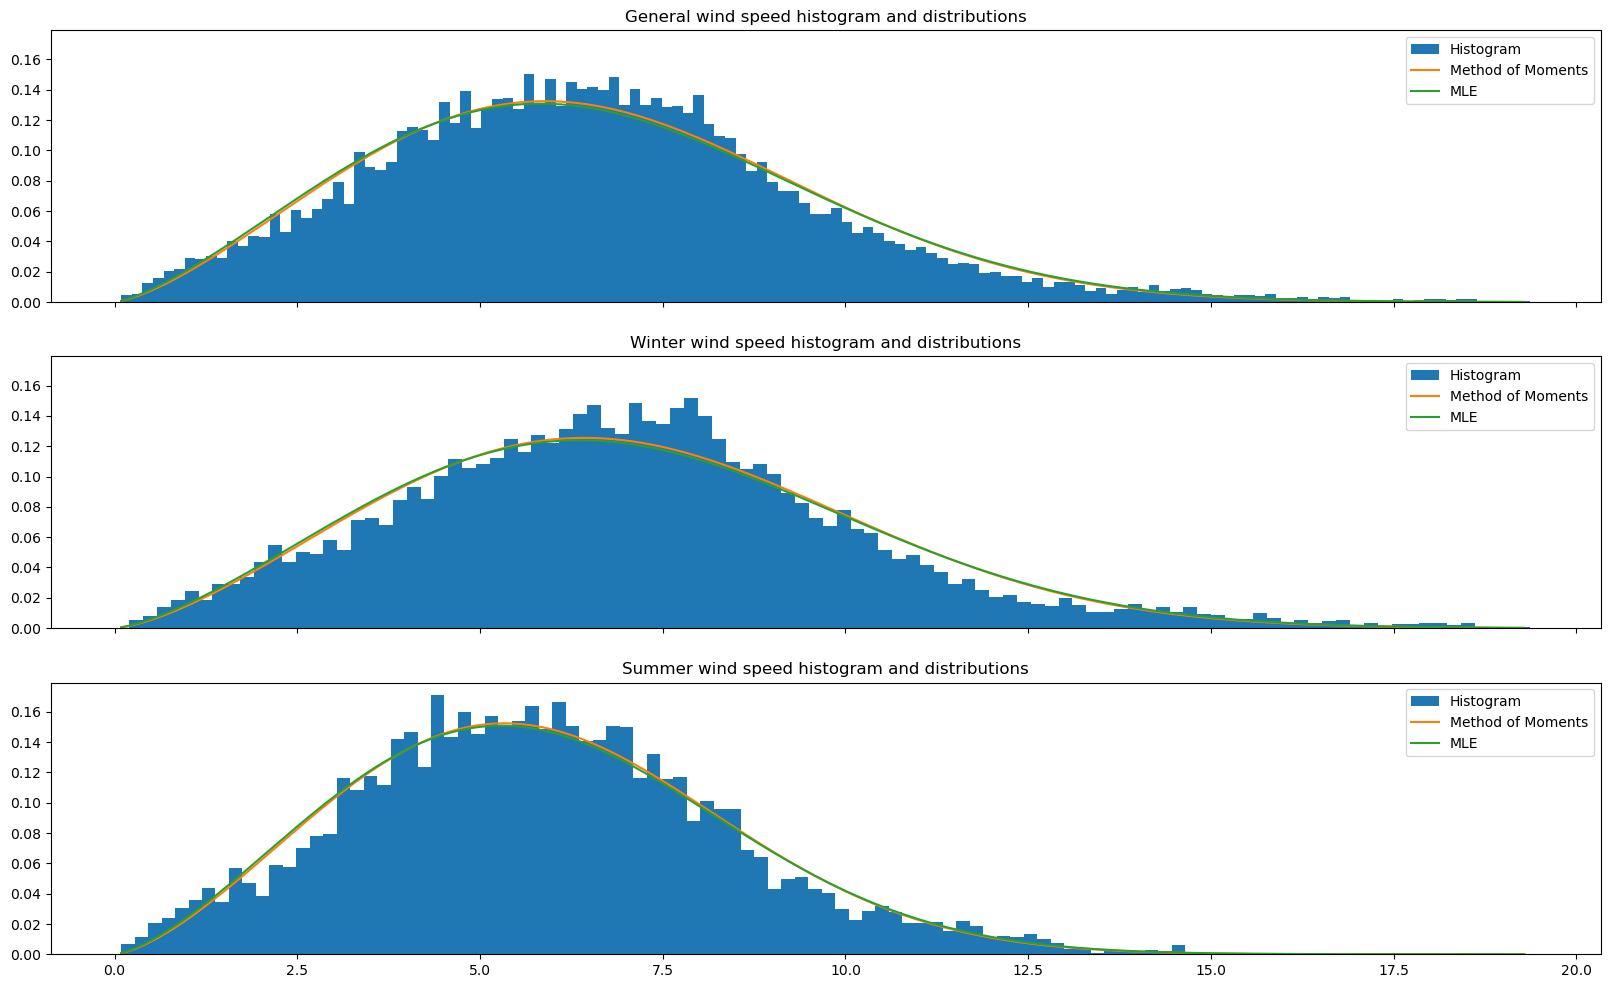

In [18]:
min_wind, max_wind = weather_df['wind speed at 50 m [m/s]'].min(), weather_df['wind speed at 50 m [m/s]'].max()

fig, axes = plt.subplots(3, 1, figsize = (20, 12), sharex=True, sharey=True)

axes[0].hist(
    weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[0].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(g_k, g_c, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[0].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(g_res.x[0], g_res.x[1], np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[0].set_title('General wind speed histogram and distributions')
axes[0].legend()


axes[1].hist(
    winter_weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(winter_weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[1].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(w_k, w_c, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[1].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(w_res.x[0], w_res.x[1], np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[1].set_title('Winter wind speed histogram and distributions')
axes[1].legend()


axes[2].hist(
    summer_weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(summer_weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[2].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(s_k, s_c, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[2].plot(
    np.arange(min_wind, max_wind, 0.1), 
    weibull_pdf(s_res.x[0], s_res.x[1], np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[2].set_title('Summer wind speed histogram and distributions')
axes[2].legend()

plt.show()

In [19]:
evaluation_weibull = {
    'General MoM': [weather_df['wind speed at 50 m [m/s]'], g_k, g_c], 
    'General MLE': [weather_df['wind speed at 50 m [m/s]'], g_res.x[0], g_res.x[1]], 
    'Winter MoM': [winter_weather_df['wind speed at 50 m [m/s]'], w_k, w_c], 
    'Winter MLE': [winter_weather_df['wind speed at 50 m [m/s]'], w_res.x[0], w_res.x[1]], 
    'Summer MoM': [summer_weather_df['wind speed at 50 m [m/s]'], s_k, s_c], 
    'Summer MLE': [summer_weather_df['wind speed at 50 m [m/s]'], s_res.x[0], s_res.x[1]]
}
for key in evaluation_weibull:
    D, p_value = sc.stats.kstest(evaluation_weibull[key][0], lambda x: weibull_cdf(evaluation_weibull[key][1], evaluation_weibull[key][2], x))
    print(f'{key} Kolmogorov-Smirnov test results:')
    print("KS statistic:", D)
    print("p-value:", p_value, '\n-------------------------------------------')

General MoM Kolmogorov-Smirnov test results:
KS statistic: 0.023846768434058863
p-value: 4.241034850792796e-09 
-------------------------------------------
General MLE Kolmogorov-Smirnov test results:
KS statistic: 0.025406722107016555
p-value: 2.85689738079976e-10 
-------------------------------------------
Winter MoM Kolmogorov-Smirnov test results:
KS statistic: 0.028228735484866707
p-value: 1.7056031521854564e-07 
-------------------------------------------
Winter MLE Kolmogorov-Smirnov test results:
KS statistic: 0.0292510228997086
p-value: 5.138116053475099e-08 
-------------------------------------------
Summer MoM Kolmogorov-Smirnov test results:
KS statistic: 0.015518575597646578
p-value: 0.05758113339836235 
-------------------------------------------
Summer MLE Kolmogorov-Smirnov test results:
KS statistic: 0.019645150867922984
p-value: 0.006813603158278718 
-------------------------------------------


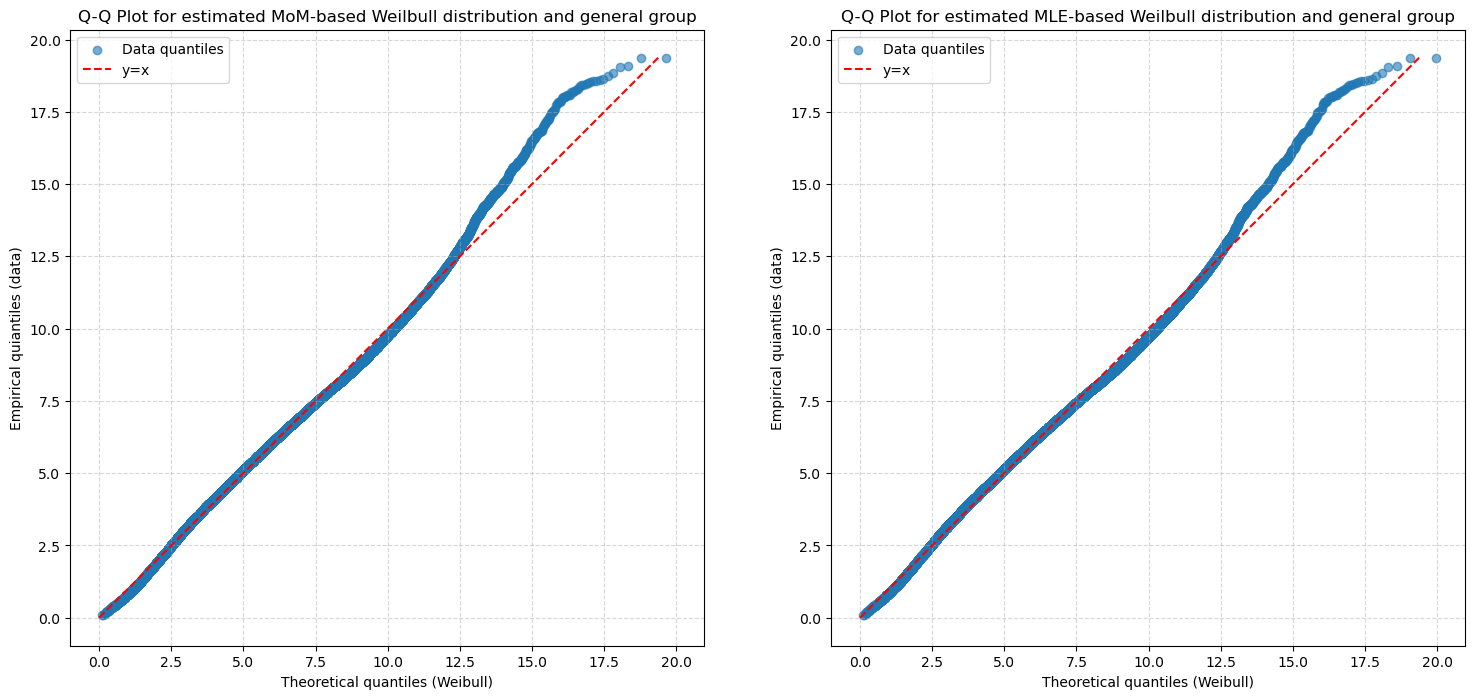

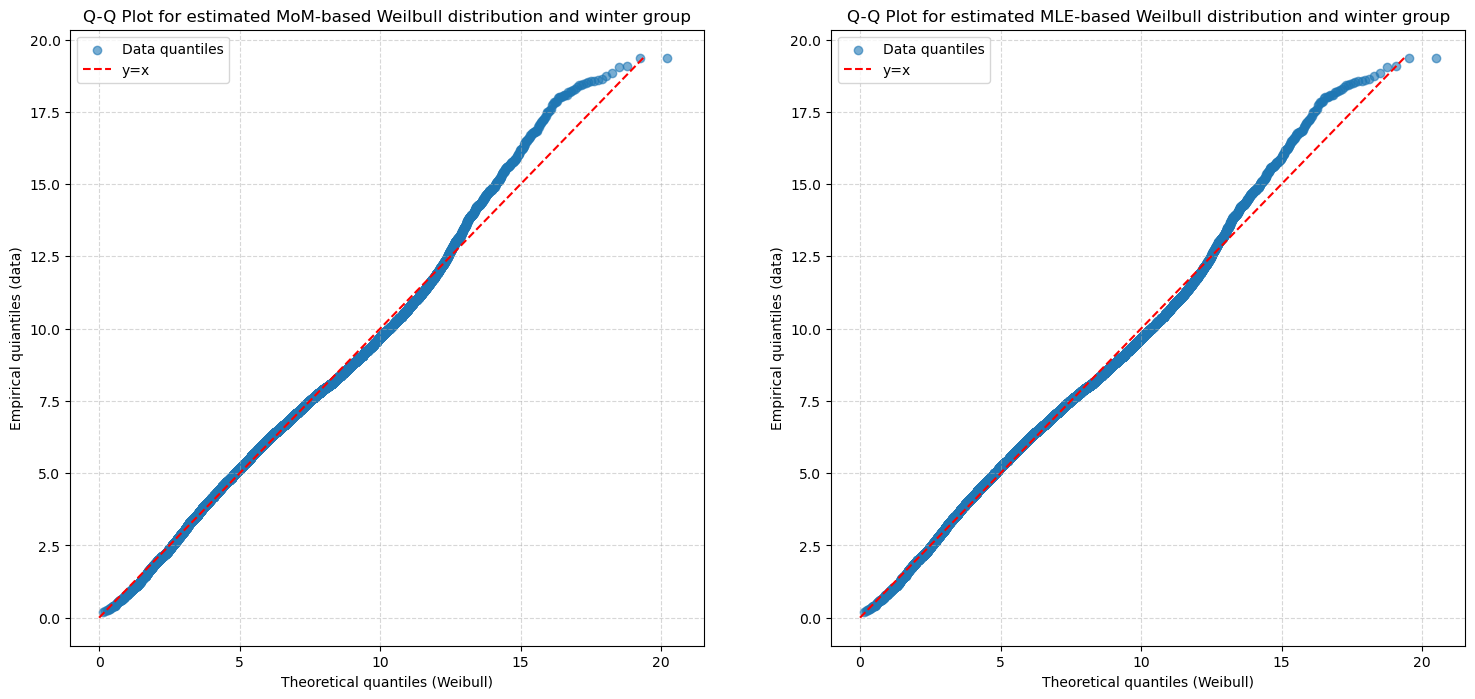

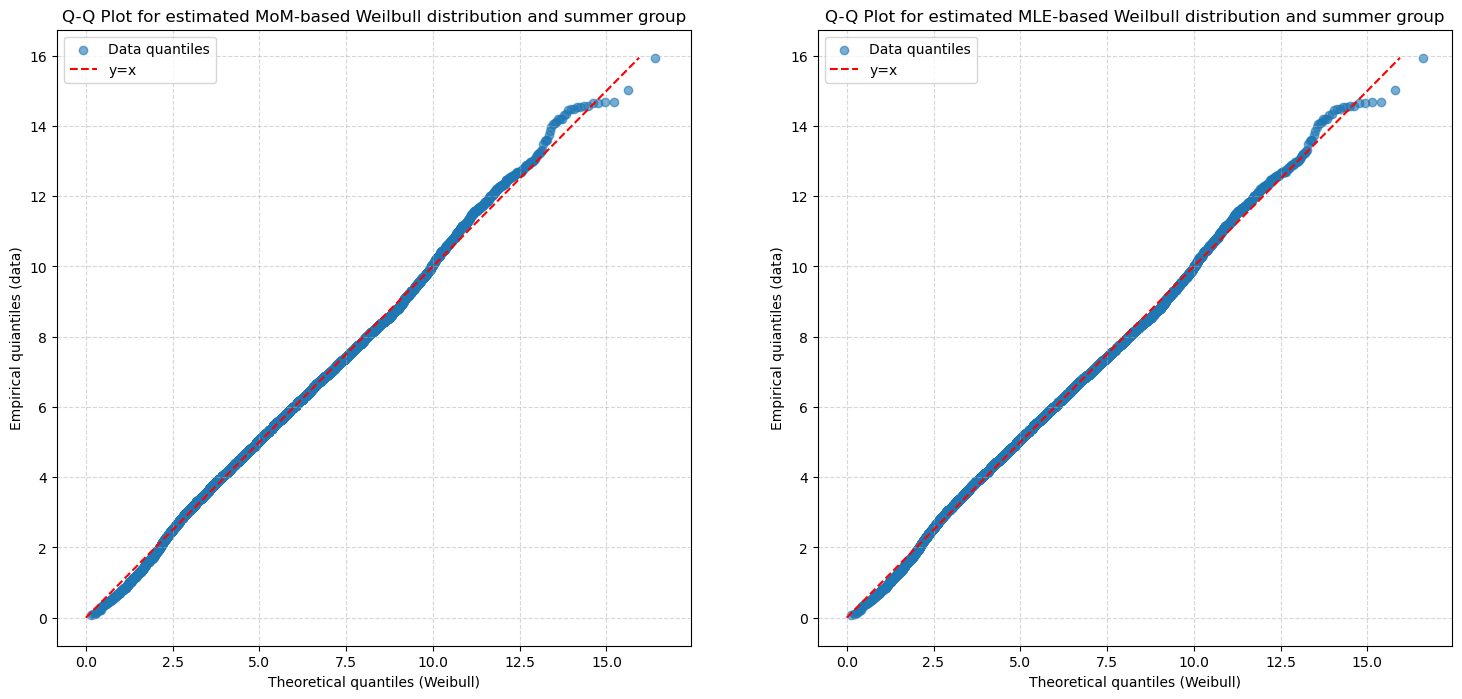

In [20]:
weibull_qq_plot(weather_df['wind speed at 50 m [m/s]'], g_k, g_c, g_res.x[0], g_res.x[1], 'MoM', 'MLE', 'general')
weibull_qq_plot(winter_weather_df['wind speed at 50 m [m/s]'], w_k, w_c, w_res.x[0], w_res.x[1], 'MoM', 'MLE', 'winter')
weibull_qq_plot(summer_weather_df['wind speed at 50 m [m/s]'], s_k, s_c, s_res.x[0], s_res.x[1], 'MoM', 'MLE', 'summer')

Basing on the <b>histogram and distributions plots</b>, the MoM-based distribution fits the data around the highest pdf (mode) slightly better than the MLE-based. However, the fitted distributions still deviate from the data.<br>
Regarding the <b>Kolmogolov-Smirnov test</b>, MoM-based results for the summer group confirms the null hypothesis if alpha <= 0,05. Regarding general and winter groups, MoM provided slightly better results ("better" = closer to confirm the null hypothesis) than the MLE too but they are still far from confirming the null hypothesis. Generally, in this case the summer group achieved clearly better results than remaining groups and MoM provides better parameter estimation than MLE for the given data and groups.<br>
<b>Q-Q Plots</b> show that estimated distributions fit data well for lower quantiles. For general and winter groups, from middle quantiles upwards the misfit starts to be very visible, which suggests the distribution did not fit well there. Similarily as in the Kolmogolov-Smirnov test, summer group seems to be the best fitted. Deviations between empirical and theoretical quantiles in the summer group start being explicit later comparing to the general and winter groups.

# 4. Rayleigh distribution parameter estimation for wind speed data

## 4.1 Creating basic functions

The SciPy includes the Rayleigh distribution functions like pdf, cdf and ppf but taking into account these functions have been prepared for the Weibull distribution it was decided to prepare them manually again to keep the same procedure in each chapter.

In [21]:
def rayleigh_pdf(sigma, v):
    return (v/(sigma**2))*np.exp((-v**2)/(2*sigma**2))

def rayleigh_cdf(sigma, v):
    return 1 - np.exp((-v**2)/(2*sigma**2))

def rayleigh_ppf(sigma, cdf):  # reversed the cdf function to calculate v using sigma and cdf
    return (-2*sigma**2*np.log(1-cdf))**(1/2)
    
def rayleigh_qq_plot(data, sigma1, sigma2, method1, method2, group):
    data_sorted = data.sort_values(ignore_index=True)
    n = len(data_sorted)

    probs = (np.arange(1, n+1)-0.5)/n

    rayleigh_ppf1 = rayleigh_ppf(sigma1, probs)
    rayleigh_ppf2 = rayleigh_ppf(sigma2, probs) 

    fig, axes = plt.subplots(1, 2, figsize = (18, 8), sharex=True, sharey=True)
    
    axes[0].scatter(rayleigh_ppf1, data_sorted, alpha=0.6, label='Data quantiles')
    axes[0].plot([0, max(data_sorted)], [0, max(data_sorted)], linestyle='--', color='r', label='y=x')
    axes[0].set_xlabel('Theoretical quantiles (Rayleigh)')
    axes[0].set_ylabel('Empirical quiantiles (data)')
    axes[0].set_title(f'Q-Q Plot for estimated {method1}-based Rayleigh distribution and {group} group')
    axes[0].legend()
    
    axes[1].scatter(rayleigh_ppf2, data_sorted, alpha=0.6, label='Data quantiles')
    axes[1].plot([0, max(data_sorted)], [0, max(data_sorted)], linestyle='--', color='r', label='y=x')
    axes[1].set_xlabel('Theoretical quantiles (Rayleigh)')
    axes[1].set_ylabel('Empirical quiantiles (data)')
    axes[1].set_title(f'Q-Q Plot for estimated {method2}-based Rayleigh distribution and {group} group')
    axes[1].legend()

    for ax in axes.ravel():
        ax.tick_params(labelleft=True)
        ax.grid(visible=True, alpha=0.5, linestyle='--')

    plt.show()

## 4.2 Estimating parameters using moment-based (mean and std) formulas

$$
\bar{v} = \sigma \sqrt{\frac{\pi }{2}} \Rightarrow \sigma = \bar{v}\sqrt{\frac{2}{\pi}}
$$
Rayleigh distribution has only one parameter sigma which can be easily calculated from e.g. mean formula.

In [22]:
def rayleigh_param_mom(avg):
    return avg*((2/np.pi)**0.5)

In [23]:
g_sigma_mom = rayleigh_param_mom(weather_df['wind speed at 50 m [m/s]'].mean())
w_sigma_mom = rayleigh_param_mom(winter_weather_df['wind speed at 50 m [m/s]'].mean())
s_sigma_mom = rayleigh_param_mom(summer_weather_df['wind speed at 50 m [m/s]'].mean())

print(
    'Estimated parameter for the general group: sigma={}'.format(g_sigma_mom), 
    'Estimated parameter for the winter group: sigma={}'.format(w_sigma_mom), 
    'Estimated parameter for the summer group: sigma={}'.format(s_sigma_mom), 
    sep='\n'
)

Estimated parameter for the general group: sigma=5.2165559786447435
Estimated parameter for the winter group: sigma=5.622184826369987
Estimated parameter for the summer group: sigma=4.653182579026348


## 4.3 Estimating parameters using Maximum Likelihood Estimation

Taking into account the shape of the log-likelihood's derivative, the parameter value where the derivative = 0 is the (local) maximum i.e. the argmax.
$$
l^{'}(\sigma) =  \frac{-2n}{\sigma} + \frac{2\sum_{1}^{n}x^{2}_{i}}{2\sigma^{3}} =  0
$$
$$
\frac{-2n}{\sigma} + \frac{\sum_{1}^{n}x^{2}_{i}}{\sigma^{3}} = 0  \quad\quad/+\frac{2n}{\sigma}
$$
$$
\frac{\sum_{1}^{n}x^{2}_{i}}{\sigma^{3}} = \frac{2n}{\sigma}  \quad\quad /*\frac{\sigma^{3}}{2n}
$$
$$
\sigma^{2} = \frac{\sum_{1}^{n}x^{2}_{i}}{2n}
$$
$$
\sigma = \sqrt{\frac{\sum_{1}^{n}x^{2}_{i}}{2n}}
$$

Sources:<br>
<a href=https://ocw.mit.edu/ans7870/18/18.443/s15/projects/Rproject3_rmd_rayleigh_theory.html>https://ocw.mit.edu/ans7870/18/18.443/s15/projects/Rproject3_rmd_rayleigh_theory.html</a><br>
<i>Estimating parameter of Rayleigh distribution by using Maximum Likelihood method and Bayes method</i>, Fitri Ardianti and Sutarman, 2018

Below 2 approaches can be found:
<ol>
    <li>Closed-form - the root (sigma value) is calculated directly from the formula.</li>
    <li>Visual inspection - the root (sigma value) is found by plotting the derivative plot by the gamma value and checking for which gamma value the output will be 0.</li>
</ol>

In [24]:
def rayleigh_param_mle(data):
    return ( (data**2).sum()/(2*len(data)) )**0.5
    
def rayleigh_log_likelihood_derivative(x, param):
    return -2*len(x)/param + (x**2).sum()/param**3

In [25]:
g_sigma_mle = rayleigh_param_mle(weather_df['wind speed at 50 m [m/s]'])
w_sigma_mle = rayleigh_param_mle(winter_weather_df['wind speed at 50 m [m/s]'])
s_sigma_mle = rayleigh_param_mle(summer_weather_df['wind speed at 50 m [m/s]'])
print(
    'Estimated parameter for the general group: sigma={}'.format(g_sigma_mle), 
    'Estimated parameter for the winter group: sigma={}'.format(w_sigma_mle), 
    'Estimated parameter for the summer group: sigma={}'.format(s_sigma_mle), 
    sep='\n'
)

Estimated parameter for the general group: sigma=5.0642161612945955
Estimated parameter for the winter group: sigma=5.43670131253913
Estimated parameter for the summer group: sigma=4.495968812129431


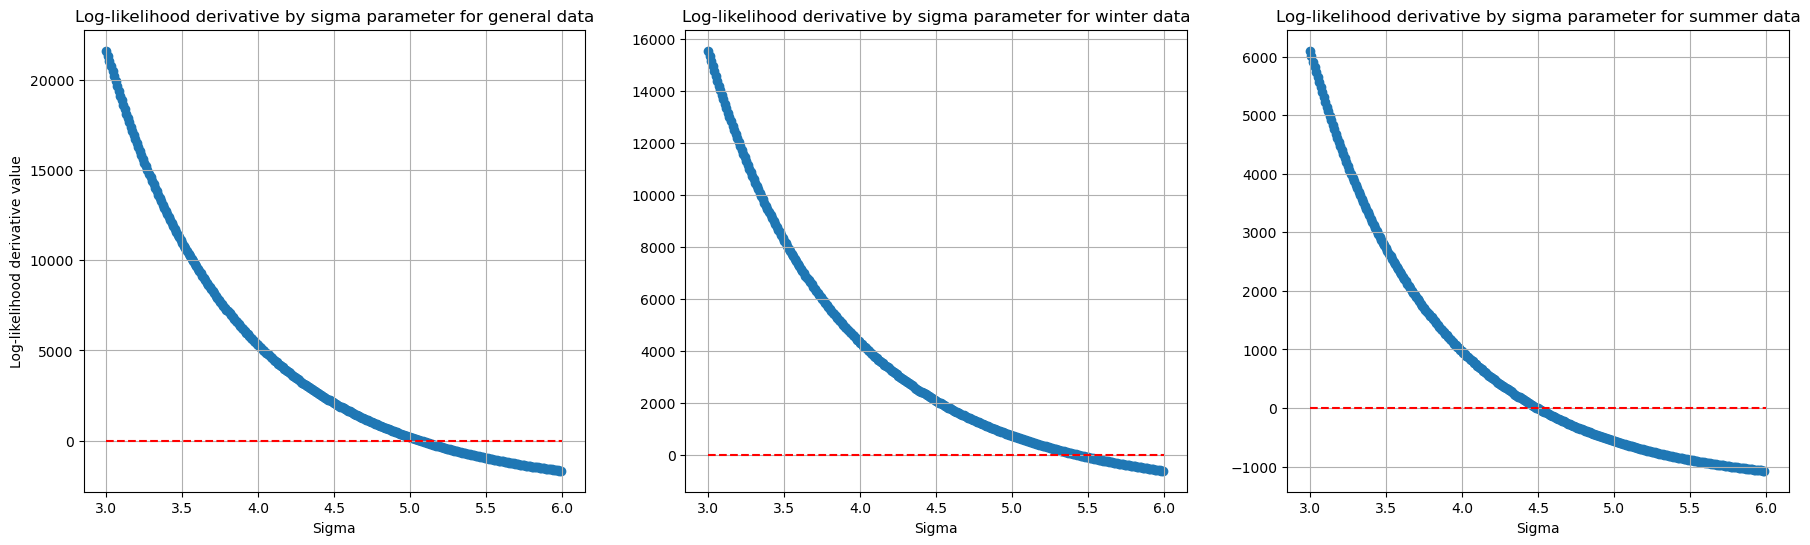

In [26]:
fig, axes = plt.subplots(1, 3, figsize = (22, 6))

axes[0].scatter(x=np.arange(3, 6, 0.01), y=rayleigh_log_likelihood_derivative(weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01)))
axes[0].hlines(y=0, xmin=3, xmax=6, linestyles='--', colors='r')
axes[0].set_title("Log-likelihood derivative by sigma parameter for general data")
axes[0].set_ylabel('Log-likelihood derivative value')
axes[0].grid()

axes[1].scatter(x=np.arange(3, 6, 0.01), y=rayleigh_log_likelihood_derivative(winter_weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01)))
axes[1].hlines(y=0, xmin=3, xmax=6, linestyles='--', colors='r')
axes[1].set_title('Log-likelihood derivative by sigma parameter for winter data')
axes[1].grid()

axes[2].scatter(x=np.arange(3, 6, 0.01), y=rayleigh_log_likelihood_derivative(summer_weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01)))
axes[2].hlines(y=0, xmin=3, xmax=6, linestyles='--', colors='r')
axes[2].set_title('Log-likelihood derivative by sigma parameter for summer data')
axes[2].grid()

for ax in axes.ravel():
    ax.set_xlabel('Sigma')

In [27]:
rayleigh_mle = pd.DataFrame(
    data={
        'general': rayleigh_log_likelihood_derivative(weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01)), 
        'winter': rayleigh_log_likelihood_derivative(winter_weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01)), 
        'summer': rayleigh_log_likelihood_derivative(summer_weather_df['wind speed at 50 m [m/s]'], np.arange(3, 6, 0.01))
    },
    index=np.arange(3, 6, 0.01)
)
rayleigh_mle[(abs(rayleigh_mle['general']) < 20) | (abs(rayleigh_mle['winter']) < 20) | (abs(rayleigh_mle['summer']) < 20)]

,general,winter,summer
4.49,2126.620841,2117.917691,8.703150
4.50,2077.858542,2083.703832,-5.845291
5.06,11.560741,622.627917,-611.067176
5.07,-15.781238,603.094184,-618.875422
5.43,-841.266595,9.278725,-850.545320
5.44,-860.327220,-4.546444,-855.780777
5.45,-879.204777,-18.245079,-860.959698


According to the graphical/numerical approach the sigma value for the: <br>
<ul>
    <li>general group should be in range (5.06; 5.07)</li>
    <li>winter group should be in range (5.43, 5.44)</li>
    <li>summer group should be in range (4.49; 4.50)</li>
</ul

It can be seen both MLE-based approaches provided very similar results i.e. closed-form approach's values are within ranges from the visual inspection. The closed-form is preferred in this case because it provides the specific value, not a range. The visual approach may have been more detailed if it had smaller steps between x-axis values within the same range.

## 4.4 Comparing results

Results will be compared using 3 methods:
<ol>
    <li>Plotting data's histogram together with fitted distribution pdf plots - Visual comparison how much the distribution's pdf plot fits histogram.</li>
    <li>Executing Kolmogorov-Smirnov test - Testing the "observed data comes from the given probability distribution" null hypothesis. If the p-value is higher than the chosen critical value (alpha), then the test does not show a statistically signifacnt difference between the data and the given probability distribution.</li>
    <li>Making Q-Q plot - Graphical comparison of empirical and theoretical distributions by plotting their quantiles against each other. </li>
</ol>

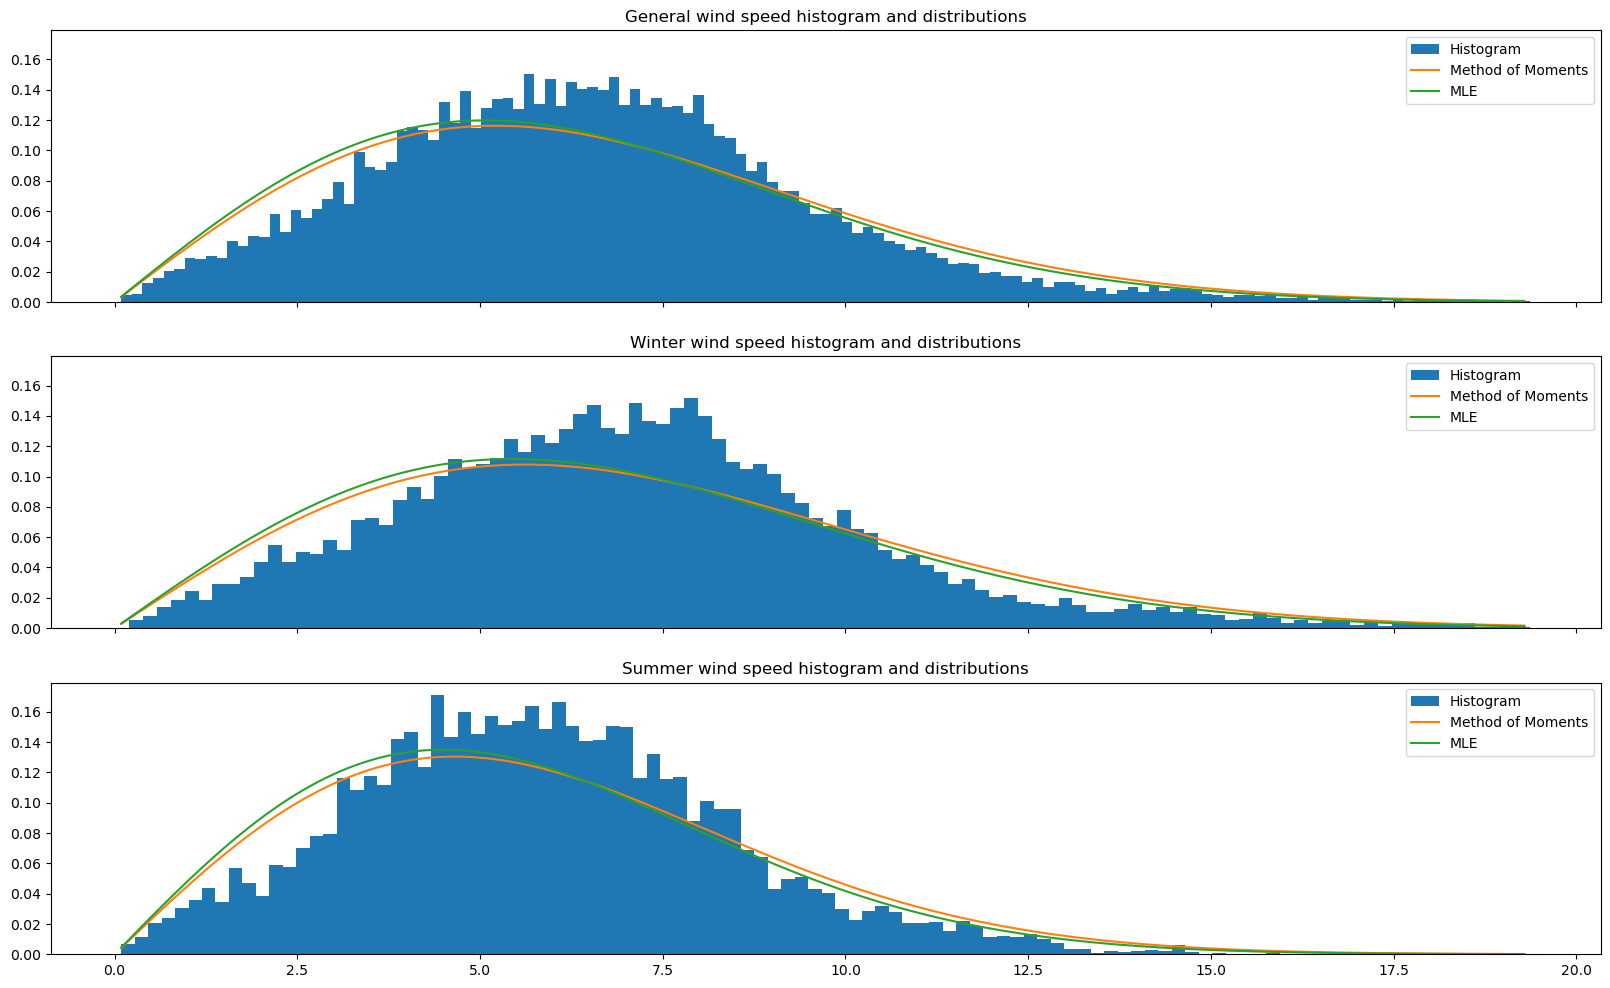

In [28]:
min_wind, max_wind = weather_df['wind speed at 50 m [m/s]'].min(), weather_df['wind speed at 50 m [m/s]'].max()

fig, axes = plt.subplots(3, 1, figsize = (20, 12), sharex=True, sharey=True)

axes[0].hist(
    weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[0].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(g_sigma_mom, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[0].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(g_sigma_mle, np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[0].set_title('General wind speed histogram and distributions')
axes[0].legend()


axes[1].hist(
    winter_weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(winter_weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[1].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(w_sigma_mom, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[1].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(w_sigma_mle, np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[1].set_title('Winter wind speed histogram and distributions')
axes[1].legend()


axes[2].hist(
    summer_weather_df['wind speed at 50 m [m/s]'], 
    bins=int( np.ceil(summer_weather_df.shape[0]**0.5) ), 
    density=True, 
    label='Histogram'
)
axes[2].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(s_sigma_mom, np.arange(min_wind, max_wind, 0.1)), 
    label='Method of Moments'
)
axes[2].plot(
    np.arange(min_wind, max_wind, 0.1), 
    rayleigh_pdf(s_sigma_mle, np.arange(min_wind, max_wind, 0.1)), 
    label='MLE'
)
axes[2].set_title('Summer wind speed histogram and distributions')
axes[2].legend()

plt.show()

In [29]:
evaluation_rayleigh = {
    'General MoM': [weather_df['wind speed at 50 m [m/s]'], g_sigma_mom], 
    'General MLE': [weather_df['wind speed at 50 m [m/s]'], g_sigma_mle], 
    'Winter MoM': [winter_weather_df['wind speed at 50 m [m/s]'], w_sigma_mom], 
    'Winter MLE': [winter_weather_df['wind speed at 50 m [m/s]'], w_sigma_mle], 
    'Summer MoM': [summer_weather_df['wind speed at 50 m [m/s]'], s_sigma_mom], 
    'Summer MLE': [summer_weather_df['wind speed at 50 m [m/s]'], s_sigma_mle]
}
for key in evaluation_rayleigh:
    D, p_value = sc.stats.kstest(evaluation_rayleigh[key][0], lambda x: rayleigh_cdf(evaluation_rayleigh[key][1], x))
    print(f'{key} Kolmogorov-Smirnov test results:')
    print(f'Sigma value:', evaluation_rayleigh[key][1])
    print("KS statistic:", D)
    print("p-value:", p_value, '\n-------------------------------------------')

General MoM Kolmogorov-Smirnov test results:
Sigma value: 5.2165559786447435
KS statistic: 0.06278458582938065
p-value: 1.4523011553884103e-60 
-------------------------------------------
General MLE Kolmogorov-Smirnov test results:
Sigma value: 5.0642161612945955
KS statistic: 0.07776192717749966
p-value: 1.0216939267060849e-92 
-------------------------------------------
Winter MoM Kolmogorov-Smirnov test results:
Sigma value: 5.622184826369987
KS statistic: 0.07208967425003418
p-value: 1.531535686217755e-46 
-------------------------------------------
Winter MLE Kolmogorov-Smirnov test results:
Sigma value: 5.43670131253913
KS statistic: 0.08947573459047448
p-value: 1.6622083319503158e-71 
-------------------------------------------
Summer MoM Kolmogorov-Smirnov test results:
Sigma value: 4.653182579026348
KS statistic: 0.07116987516108178
p-value: 8.604479841780369e-33 
-------------------------------------------
Summer MLE Kolmogorov-Smirnov test results:
Sigma value: 4.4959688121

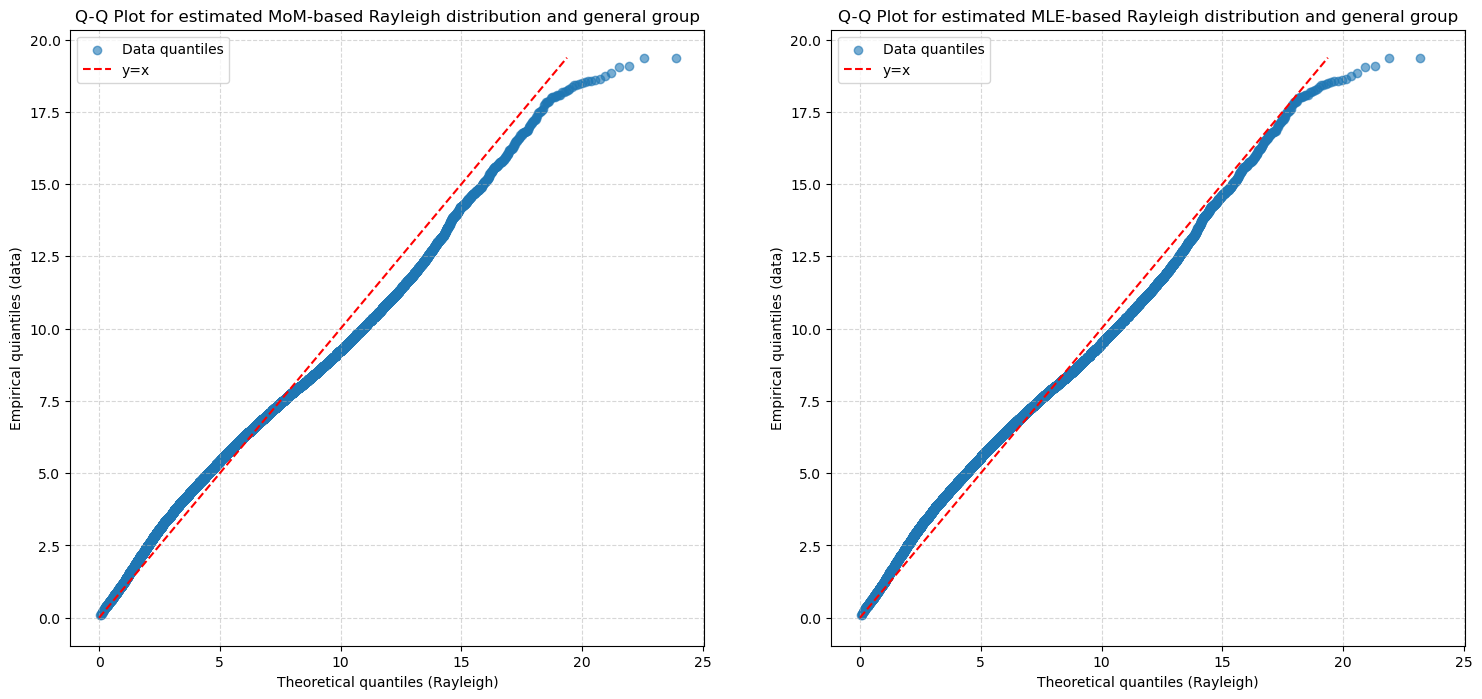

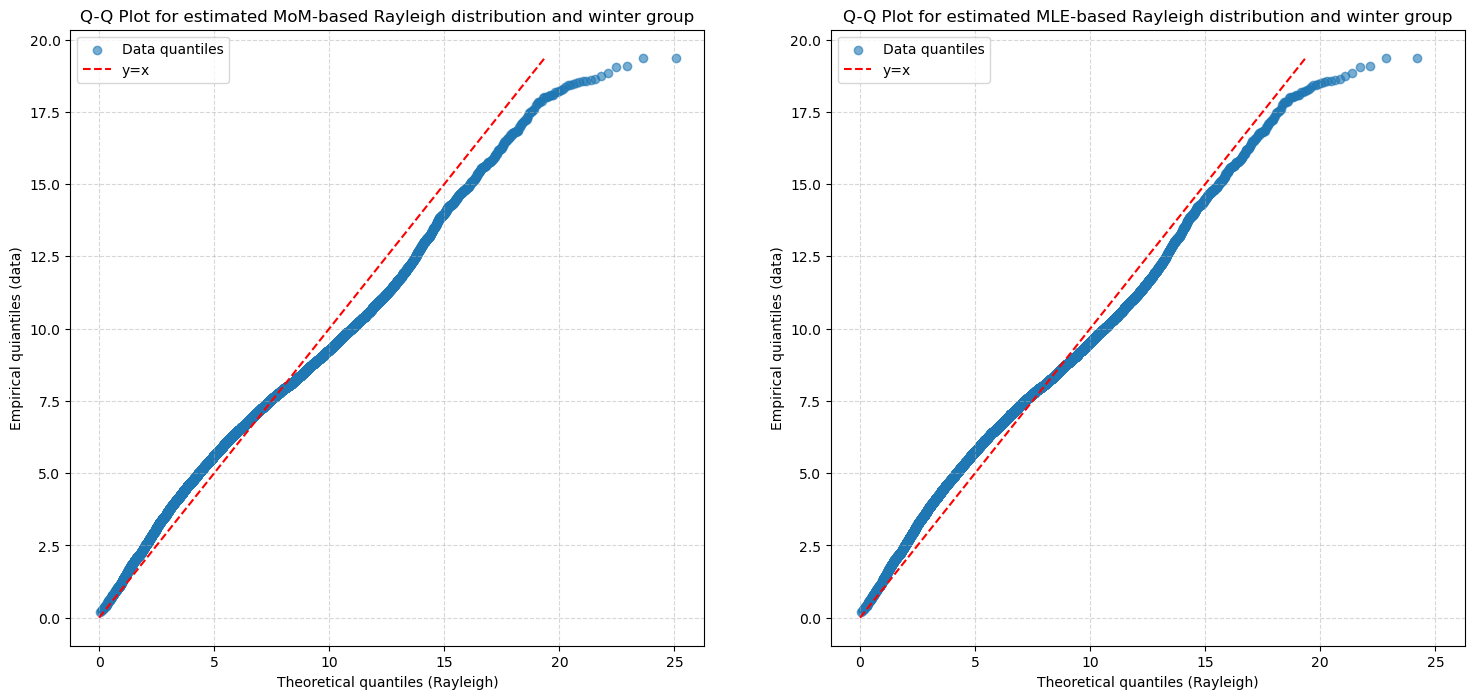

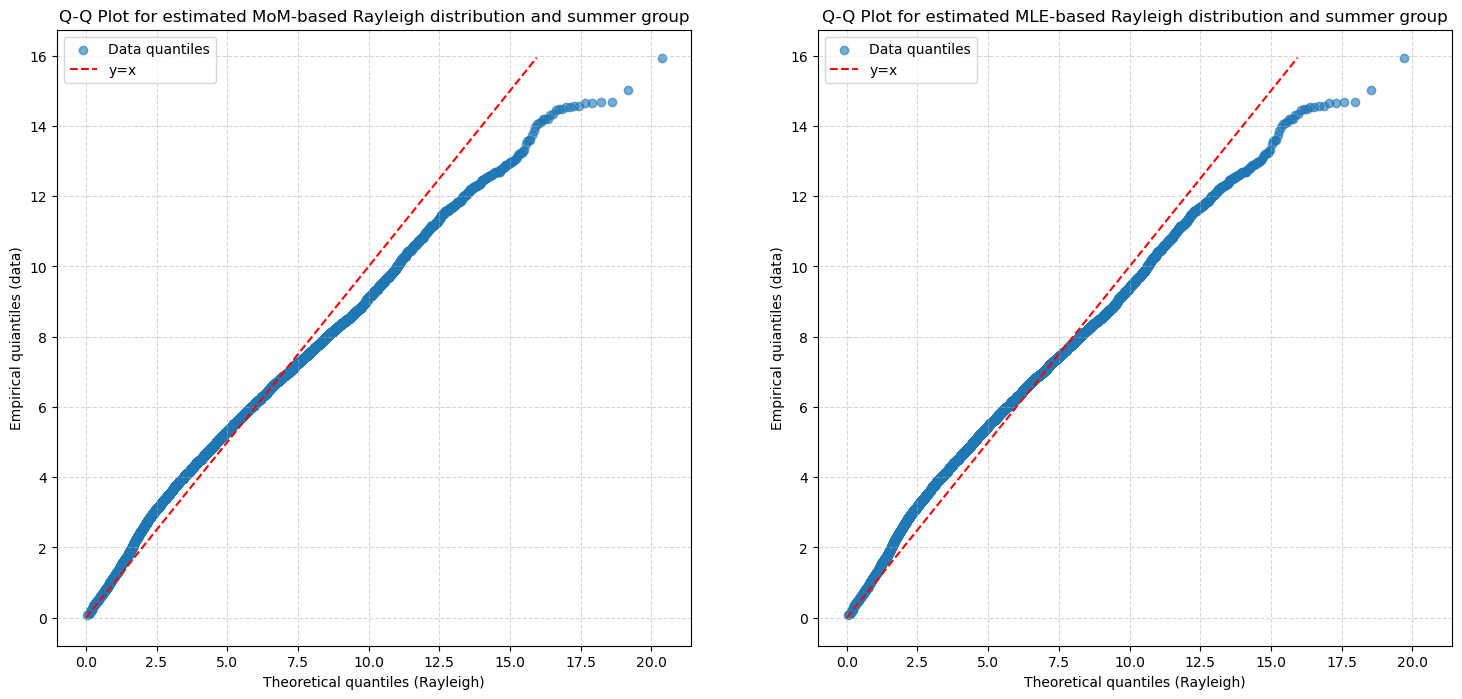

In [30]:
rayleigh_qq_plot(weather_df['wind speed at 50 m [m/s]'], g_sigma_mom, g_sigma_mle, 'MoM', 'MLE', 'general')
rayleigh_qq_plot(winter_weather_df['wind speed at 50 m [m/s]'], w_sigma_mom, w_sigma_mle, 'MoM', 'MLE', 'winter')
rayleigh_qq_plot(summer_weather_df['wind speed at 50 m [m/s]'], s_sigma_mom, s_sigma_mle, 'MoM', 'MLE', 'summer')

Basing on the <b>histogram and distribution plots</b>, both models do not fit the data well. Estimated distributions are too left-skewed and seem to have lower kurtosis than the data. <br>
According to the <b>Kolmogolov-Smirnov test</b> the data does not fit the estimated distributions (p-values are extremely low). <br>
Modeled Rayleigh distribution does not look promising in <b>Q-Q Plots</b> as well. The data deviates strongly from the theoretical results in the entire range, in the upper 2/3rd of the range in particular. 

# 5. Discussion and conclusions

Estimated Weibull and Rayleigh distributions almost entirely do not fit the data. The only estimation which could be treated as a good fit is Method of Moments for Weibull distribution, for summer group data. It can be noticed the Weibull distribution is generally closer to fit datasets than the Rayleigh distribution. <br>
Both Method of Moments and Maximum Likelihood Estimation provided similar results for the Weibull distribution. The difference between these estimation methods is more visible in the Rayleigh distribution cases where in each evaluation approach (histogram and distributions plot, KS test, Q-Q plots) more explicit differences between methods can be spotted e.g. different kurtosis, completely different scale of the KS test's results, different deviation from theoretical quantiles.

# 6. Ideas of extending the analysis

If a distribution was crucial for further calculations, The following ideas could be used:
<ul>
    <li>Using different data source e.g. <a href="https://danepubliczne.imgw.pl/">IMGW</a></li>
    <li>Dividing data into other groups e.g. 4 seasons</li>
    <li>Using other parameter estimation methods than MoM and MLE</li>
    <li>Choosing other distribution e.g. Log-normal, Gamma</li>
    <li>Using a solution which does not require fitting a distribution like Bootstrapping</li>
    <li>Combining above options</li>
</ul>
Apart from the above, other extensions may include ideas based on using other data present in the dataset i.e.:
<ul>
    <li>Performing similar analysis for the temperature data</li>
    <li>Performing similar analysis for the pressure data</li>
    <li>Performing similar analysis for the wind direction data</li>
    <li>Creating models e.g. wind speed by historical data (time series), temperature, pressure, wind direction</li>
</ul>

<i>A Statistical Analysis of Wind Speed Probabilistic Distributions for the Wind Power Assessment in Different Regions</i>, Yuly Bay, Nikolay Ruban, Mikhail Andreev, Alexandr Gusev, 2021